In [ ]:
.
import pandas as pd  #For handling datasets
import numpy as np   #For numerical operations

np.random.seed(42)

In [ ]:
#Loading the dataset.
from google.colab import files

uploaded = files.upload()


df = pd.read_excel(next(iter(uploaded)))  #Automatically reads the uploaded file.

df.head() #Displaying the data.

Saving ABC Company.xlsx to ABC Company (1).xlsx


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [ ]:
print("Dataset Shape:", df.shape)  #Rows and columns.

print("\nDataset Info:")
df.info()  #Info about data types and missing values.

print("\nFirst 5 Rows of Dataset:")
display(df.head())

print("\nLast 5 Rows of Dataset:")
display(df.tail())

print("\nSummary Statistics for Numerical Columns:")
display(df.describe())

Dataset Shape: (458, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB

First 5 Rows of Dataset:


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0



Last 5 Rows of Dataset:


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,2023-03-07 00:00:00,231,Kansas,947276.0



Summary Statistics for Numerical Columns:


,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)

print("Columns after standardization:")
display(df.head())

Columns after standardization:


,name,team,number,position,age,height,weight,college,salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [ ]:
# Missing values overview
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
print("Missing Values Percentage per Column:")
display(missing_percent)

# Numeric columns: fill with median
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) > 0:
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns: fill with mode safely
cat_cols = df.select_dtypes(include=['object', 'category']).columns
filled_with_mode = []
for col in cat_cols:
    if df[col].isnull().any():
        modes = df[col].mode()
        if len(modes) > 0:
            df[col] = df[col].fillna(modes[0])
            filled_with_mode.append(col)
        else:
            # If no mode available (all NaN), fill with explicit placeholder
            df[col] = df[col].fillna("Unknown")
            filled_with_mode.append(col + " (filled with 'Unknown')")

print("\nCategorical columns filled with mode or placeholder:")
print(filled_with_mode)

print("\nMissing Values After Imputation:")
display(df.isnull().sum())

Missing Values Percentage per Column:


,0
college,18.340611
salary,2.401747
name,0.000000
team,0.000000
number,0.000000
age,0.000000
position,0.000000
weight,0.000000
height,0.000000



Categorical columns filled with mode or placeholder:
['college']

Missing Values After Imputation:


,0
name,0
team,0
number,0
position,0
age,0
height,0
weight,0
college,0
salary,0


In [ ]:
num_duplicates = df.duplicated().sum() #Checking for duplicates.
print(f"Number of duplicate rows before removal: {num_duplicates}")


df = df.drop_duplicates() #Removing duplicates.


print(f"Number of duplicate rows after removal: {df.duplicated().sum()}") #Verifying removal.

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


In [ ]:
#Preprocessing:
#Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis. (1 mark)

if 'height' in df.columns:
    original_height = df['height'].copy(deep=True)
    df['height'] = np.random.randint(150, 181, size=len(df))  # inclusive upper bound set by 181
    height_comparison = pd.DataFrame({
        "original_height": original_height.reset_index(drop=True),
        "updated_height": df['height'].reset_index(drop=True)
    })
    print("Height column replaced with random integers (150–180). First 10 rows:")
    display(height_comparison.head(10))
else:
    raise KeyError("Required column 'height' not found in the dataset.")

Height column replaced with random integers (150–180). First 10 rows:


,original_height,updated_height
0,2023-02-06 00:00:00,156
1,2023-06-06 00:00:00,169
2,2023-05-06 00:00:00,178
3,2023-05-06 00:00:00,164
4,2023-10-06 00:00:00,160
5,2023-09-06 00:00:00,157
6,2023-08-06 00:00:00,178
7,7-0,170
8,2023-02-06 00:00:00,156
9,2023-04-06 00:00:00,175


In [ ]:
#Analysis Tasks: - 1.
#Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. (2 marks).


team_distribution = df['team'].value_counts() #Counting employees per team.


team_percentage = (team_distribution / len(df)) * 100 #Calculating percentage split per team.


team_analysis = pd.DataFrame({ #Combining into a single DataFrame.
    'Employee_Count': team_distribution,
    'Percentage_Split (%)': team_percentage.round(2)
}).sort_values(by='Employee_Count', ascending=False)

print("Team-wise Employee Distribution and Percentage Split:")
display(team_analysis)

Team-wise Employee Distribution and Percentage Split:


,Employee_Count,Percentage_Split (%)
team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
Milwaukee Bucks,16,3.49
New York Knicks,16,3.49
Boston Celtics,15,3.28
Los Angeles Clippers,15,3.28
Los Angeles Lakers,15,3.28
Phoenix Suns,15,3.28


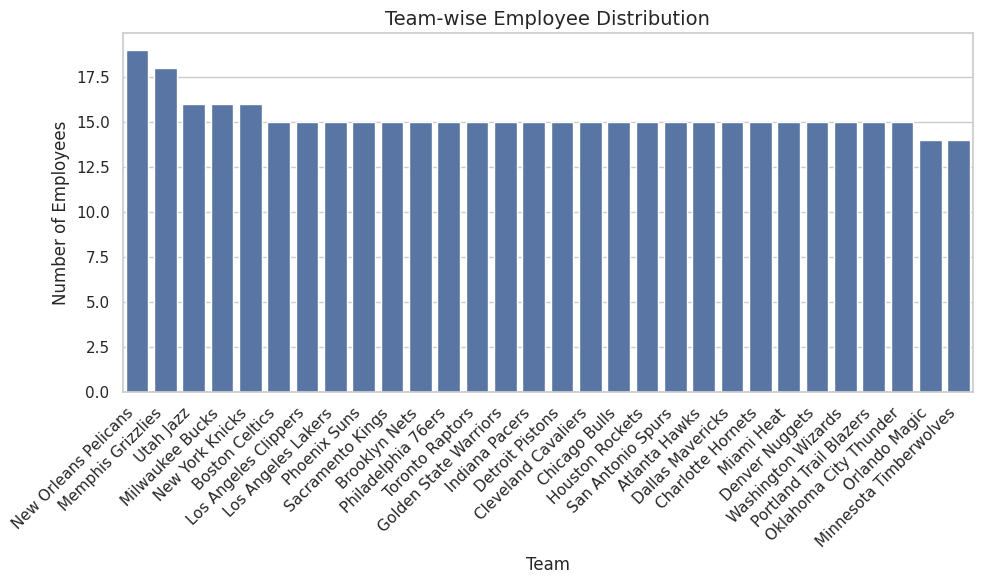

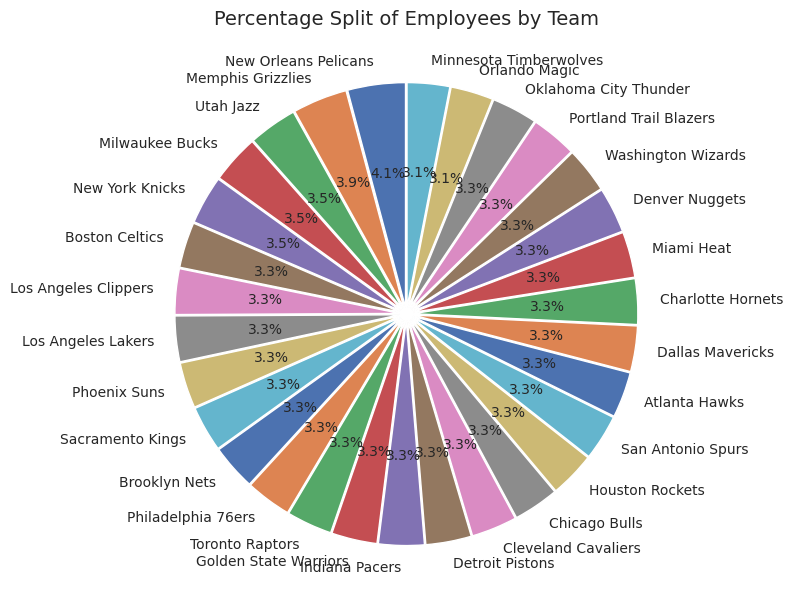

In [ ]:
#Graphical Representation for analysis 1:
#For the above analysis create appropriate visualizations to present your findings effectively.



import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


team_plot_df = team_analysis.reset_index().rename(columns={'index': 'team'})

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=team_plot_df, x='team', y='Employee_Count', order=team_plot_df['team'])
plt.title("Team-wise Employee Distribution", fontsize=14)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
explode_values = [0.03] * len(team_plot_df)
plt.pie(team_plot_df['Percentage_Split (%)'],
        labels=team_plot_df['team'],
        autopct="%1.1f%%",
        startangle=90,
        explode=explode_values,
        shadow=False,
        textprops={'fontsize': 10})
plt.title("Percentage Split of Employees by Team", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#Analysis Tasks:- 2
#Segregate employees based on their positions within the company. (2 marks).



if 'position' not in df.columns: #Checking if 'position' column exists.
    print("Error: 'position' column is not found in the dataset.")
else:

    position_distribution = df['position'].value_counts()  #Count of employees per position


    position_percentage = (position_distribution / len(df)) * 100 #Percentage split for each position.


    position_analysis = pd.DataFrame({ #Combining into a clean table.
        'Employee_Count': position_distribution,
        'Percentage_Split (%)': position_percentage.round(2)
    }).sort_values(by='Employee_Count', ascending=False)

    print("Employee Segregation Based on Positions:")
    display(position_analysis)

Employee Segregation Based on Positions:


,Employee_Count,Percentage_Split (%)
position,,
SG,102,22.27
PF,100,21.83
PG,92,20.09
SF,85,18.56
C,79,17.25


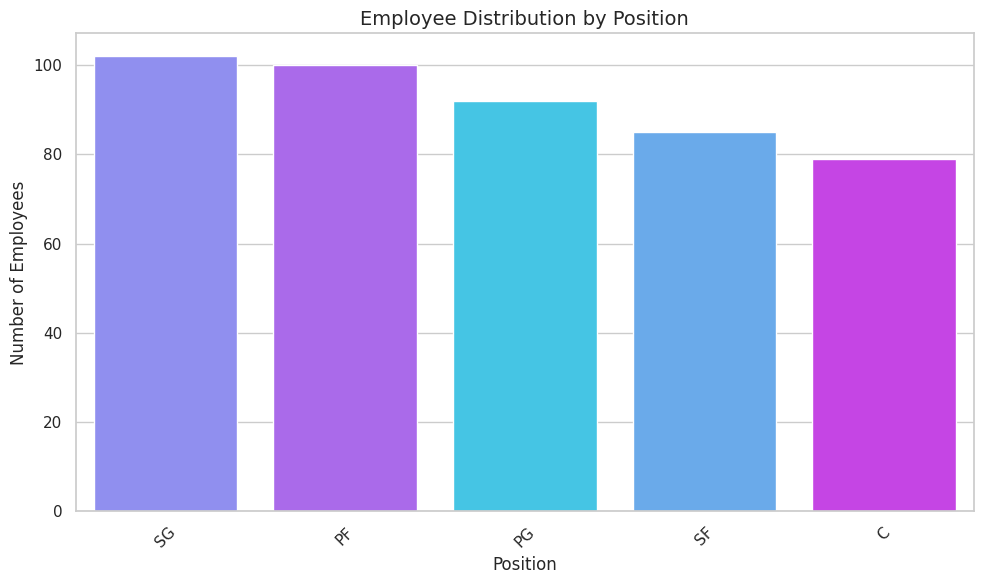

In [ ]:
#Graphical Representation for analysis 2:
#For the above analysis create appropriate visualizations to present your findings effectively.

import seaborn as sns #Importing libraries.
import matplotlib.pyplot as plt

position_order = df['position'].value_counts().index

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x = 'position',
    hue = 'position',
    legend = False,
    palette = 'cool',
    order = position_order
)

plt.title("Employee Distribution by Position", fontsize=14)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Analysis 3: -
#Identify the predominant age group among employees. (2 marks).

if "age" not in df.columns:
    print("Error: 'age' column not found.")
else:
    bins = [0, 25, 35, 45, 55, 100] #Define age ranges for grouping.
    labels = ["<25", "25-35", "35-45", "45-55", "55+"]


    df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)  #Categorizing employees into age groups.

    age_group_counts = df["age_group"].value_counts().sort_index() #Count the number of employees in each age group.

    print("Employee Count by Age Group:")
    display(age_group_counts)

    predominant_group = age_group_counts.idxmax() #Identify the predominant age group.
    print(f"\nPredominant Age Group: {predominant_group}")

Employee Count by Age Group:


,count
age_group,
<25,154
25-35,272
35-45,32
45-55,0
55+,0



Predominant Age Group: 25-35


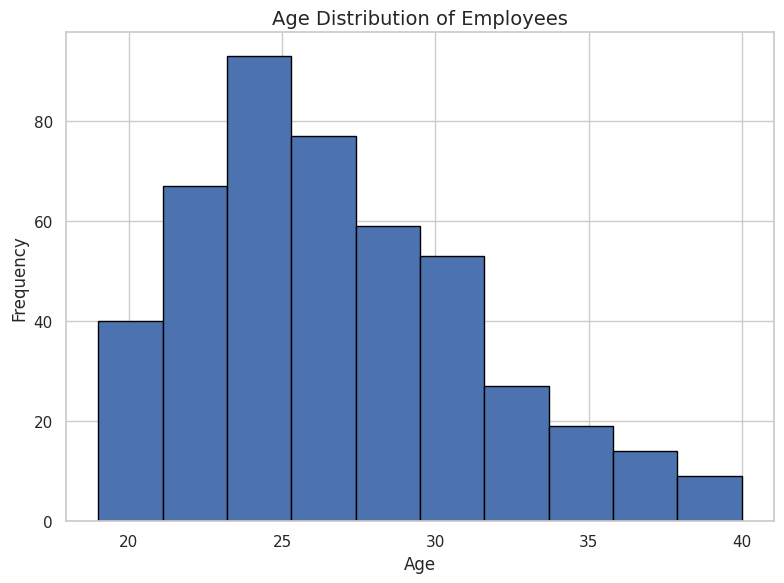

In [ ]:
#Graphical Representation for analysis 3:
#For the above analysis create appropriate visualizations to present your findings effectively.


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))


plt.hist(df['age'], bins=10, edgecolor='black') #Using histogram to represent age distribution.

plt.title("Age Distribution of Employees", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
#Analysis 4: -
#Discover which team and position have the highest salary expenditure. (2 marks).

required_columns = ['team', 'position', 'salary'] #Checking necessary columns.
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Error: '{col}' column not found in the dataset.")

team_salary_expenditure = df.groupby('team')['salary'].sum().sort_values(ascending=False) #Calculating total salary expenditure per team.
print("Total Salary Expenditure by Team:")
display(team_salary_expenditure)

top_team = team_salary_expenditure.idxmax() #Identifying team with highest salary expenditure.
top_team_salary = team_salary_expenditure.max()
print(f"\nTeam with Highest Salary Expenditure: {top_team} (Total: {top_team_salary})")

position_salary_expenditure = df.groupby('position')['salary'].sum().sort_values(ascending=False) #Calculating total salary expenditure per position.
print("\nTotal Salary Expenditure by Position:")
display(position_salary_expenditure)


top_position = position_salary_expenditure.idxmax() #Identifying position with highest salary expenditure.
top_position_salary = position_salary_expenditure.max()
print(f"\nPosition with Highest Salary Expenditure: {top_position} (Total: {top_position_salary})")

Total Salary Expenditure by Team:


,salary
team,
Cleveland Cavaliers,106988689.0
Los Angeles Clippers,94854640.0
Oklahoma City Thunder,93765298.0
Golden State Warriors,88868997.0
Chicago Bulls,86783378.0
San Antonio Spurs,84442733.0
New Orleans Pelicans,82750774.0
Miami Heat,82515673.0
Charlotte Hornets,78340920.0



Team with Highest Salary Expenditure: Cleveland Cavaliers (Total: 106988689.0)

Total Salary Expenditure by Position:


,salary
position,
C,466377332.0
PG,446848971.0
PF,442560850.0
SF,408020976.0
SG,396976258.0



Position with Highest Salary Expenditure: C (Total: 466377332.0)


<Figure size 2160x1200 with 0 Axes>

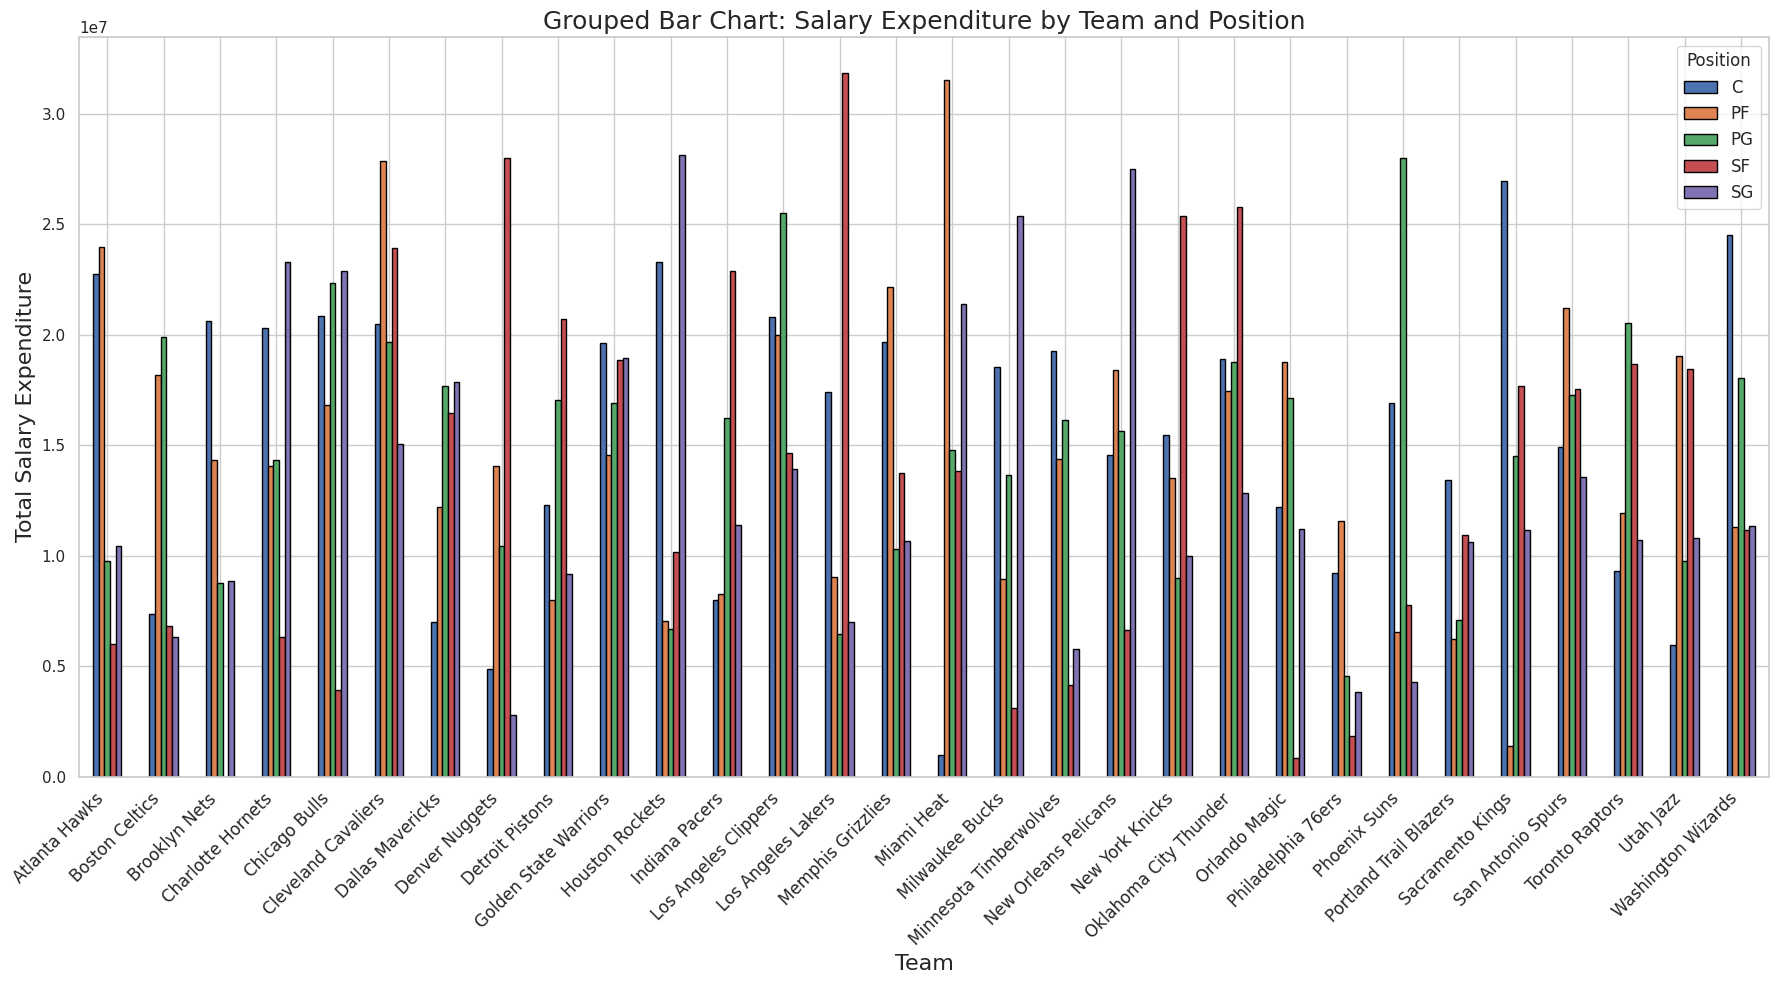

In [ ]:
#Graphical Representation for analysis 4:
#For the above analysis create appropriate visualizations to present your findings effectively.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Pivot table for grouped bar chart
salary_pivot = df.pivot_table(
    values='salary',
    index='team',
    columns='position',
    aggfunc='sum'
)

# Plotting the grouped bar chart
plt.figure(figsize=(18, 10), dpi=120)

salary_pivot.plot(kind='bar', figsize=(18, 10), edgecolor='black')

plt.title("Grouped Bar Chart: Salary Expenditure by Team and Position", fontsize=18)
plt.xlabel("Team", fontsize=16)
plt.ylabel("Total Salary Expenditure", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title="Position", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Analysis 5: -
#Investigate if there's any correlation between age and salary, and represent it visually. (2 marks).

if 'age' in df.columns and 'salary' in df.columns: #Checking if required columns exist before analysis.
    age_salary_corr = df[['age', 'salary']].corr().iloc[0, 1] #Calculating correlation between age and salary.

    print("Correlation between Age and Salary:")
    print(age_salary_corr)
else:
    print("Error: Required columns ('age' or 'salary') are missing.")


Correlation between Age and Salary:
0.21400941226570955


/tmp/ipython-input-4031977721.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


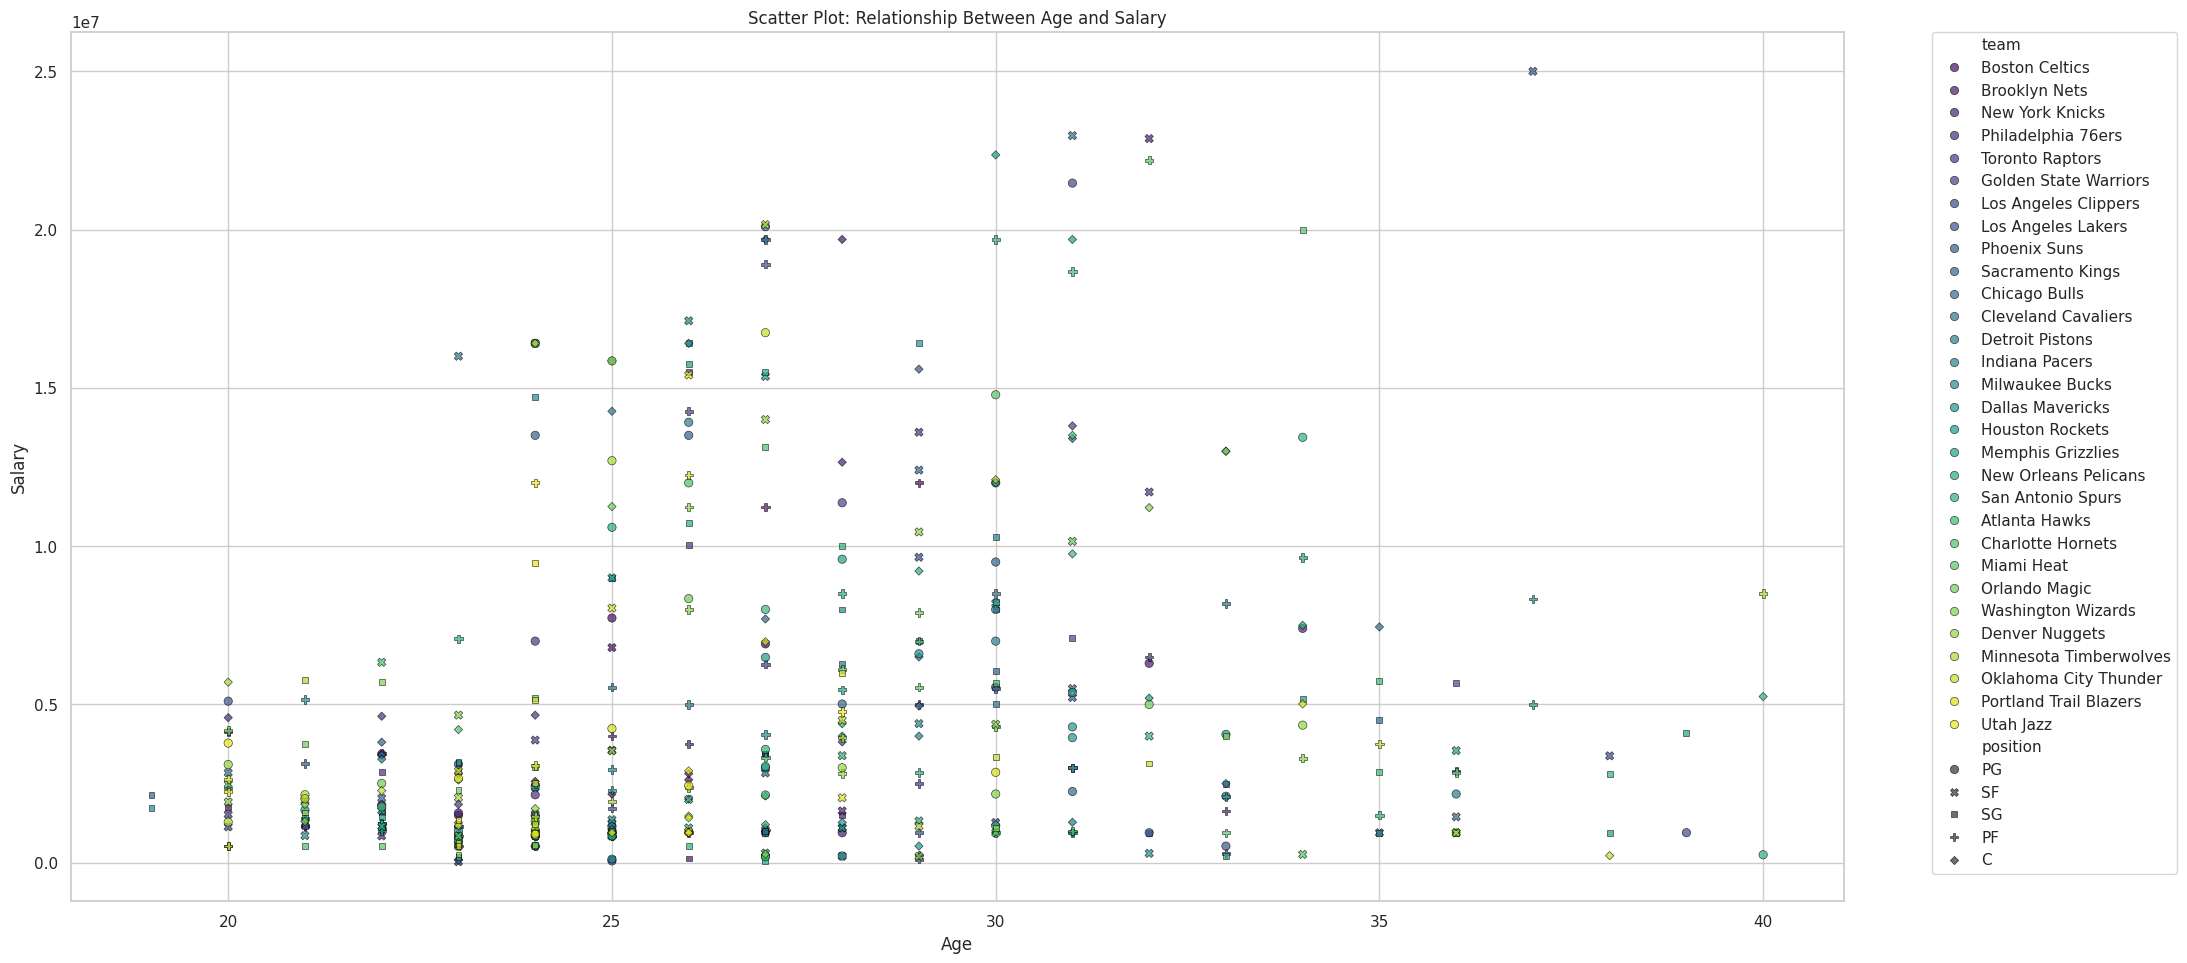

In [ ]:
#Graphical Representation for analysis 5:
#For the above analysis create appropriate visualizations to present your findings effectively.


import matplotlib.pyplot as plt #Importing libraries.

plt.figure(figsize=(22, 10), constrained_layout=True) #Scatter Plot for Analysis 5: Relationship between Age and Salary.
sns.scatterplot(
    data=df,
    x = 'age',
    y = 'salary',
    hue = 'team',                      # categorical hue
    style = 'position',                # categorical style markers
    palette = 'viridis',               # color palette
    hue_order = df['team'].unique(),   # ordering for hue
    markers = True,                    # different markers for style
    style_order = df['position'].unique(),  # ordering for style
    legend = 'full',                   # show full legend
    alpha = 0.7,                       # transparency
    edgecolor = 'black',               # marker edge color
    linewidth = 0.5                    # marker edge thickness
)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) #Moving legend to the right side.

plt.title("Scatter Plot: Relationship Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

In [ ]:
#Data Story:
#Provide insights gained from the analysis, highlighting key trends, patterns, and correlations within the dataset.


#1. Largest team information.
team_largest = team_analysis['Employee_Count'].idxmax()
team_count = team_analysis.loc[team_largest, 'Employee_Count']
team_percent = team_analysis.loc[team_largest, 'Percentage_Split (%)']

#2. Top positions.
top_positions_list = position_analysis.head(2).index.tolist()
top_positions = ", ".join(top_positions_list)
top_positions_percent = position_analysis['Percentage_Split (%)'].head(2).sum()

#3. Predominant age group.
predominant_age_group = age_group_counts.idxmax()

#4. Highest salary expenditure.
highest_cost_team = team_salary_expenditure.idxmax()
highest_cost_team_salary = team_salary_expenditure.max()

highest_cost_position = position_salary_expenditure.idxmax()
highest_cost_position_salary = position_salary_expenditure.max()

#5. Correlation & interpretation.
corr_value = round(age_salary_corr, 3)

if abs(corr_value) < 0.2:
    corr_strength = "a very weak"
    corr_interpretation = "does not"
elif abs(corr_value) < 0.4:
    corr_strength = "a weak"
    corr_interpretation = "does not consistently"
elif abs(corr_value) < 0.6:
    corr_strength = "a moderate"
    corr_interpretation = "somewhat"
else:
    corr_strength = "a strong"
    corr_interpretation = "significantly"


print("DATA STORY — SUMMARY\n")

print(f"1. Team Distribution:\n"
      f"The {team_largest} team has the highest employee strength "
      f"({team_count} employees, {team_percent}%), indicating that most of the workforce "
      f"is concentrated in this department.\n")

print(f"2. Position Segregation:\n"
      f"The most common roles in the organization are {top_positions}, together accounting "
      f"for {top_positions_percent}% of the total workforce, showing a clear concentration "
      f"of employees in key operational positions.\n")

print(f"3. Age Group Analysis:\n"
      f"The predominant age category is {predominant_age_group}, suggesting that the company "
      f"primarily employs individuals in early– to mid-career stages.\n")

print("4. Salary Expenditure:\n"
      f"The highest-spending team is {highest_cost_team}, with a total salary outlay of ₹{highest_cost_team_salary:,}. "
      f"Similarly, the {highest_cost_position} role incurs the largest salary cost among positions "
      f"(₹{highest_cost_position_salary:,}), reflecting the strategic value and seniority associated with this role.\n")

print(f"5. Age–Salary Relationship:\n"
      f"The correlation between age and salary is {corr_value}, indicating {corr_strength} relationship. "
      f"This suggests that age {corr_interpretation} drive higher salaries in the organization.\n")

print("Overall, the analysis highlights the company's workforce concentration, key operational roles, "
      "salary allocation patterns, and demographic structure. These insights can support workforce planning, "
      "budgeting, and strategic HR decisions.")

DATA STORY — SUMMARY

1. Team Distribution:
The New Orleans Pelicans team has the highest employee strength (19 employees, 4.15%), indicating that most of the workforce is concentrated in this department.

2. Position Segregation:
The most common roles in the organization are SG, PF, together accounting for 44.099999999999994% of the total workforce, showing a clear concentration of employees in key operational positions.

3. Age Group Analysis:
The predominant age category is 25-35, suggesting that the company primarily employs individuals in early– to mid-career stages.

4. Salary Expenditure:
The highest-spending team is Cleveland Cavaliers, with a total salary outlay of ₹106,988,689.0. Similarly, the C role incurs the largest salary cost among positions (₹466,377,332.0), reflecting the strategic value and seniority associated with this role.

5. Age–Salary Relationship:
The correlation between age and salary is 0.214, indicating a weak relationship. This suggests that age does not 